<img src="pics/Logo_eScienceInstitute.png" width="500">

# UW eScience Python Seminar: Fall 2015

## *Introduction to Social Network Analysis in Python*

### *José Manuel Magallanes Ph.D *
**email: magajm@uw.edu**

* Senior Data Science Fellow at eScience Institute and Visiting Professor at Evans School of Public Policy and Governance, University of Washington, Seattle
* Professor of Political Science and Public Policy, Pontificia Universidad Católica del Perú, Lima


Download materials at https://github.com/CoursesAndTutorials/IntroToSNA

Plan for this presentation:
1. Data formats
2. Importing Data and Building a Network
3. Exploring Network, agents and groups
4. Exporting the Network 

## 1. Data Formats

In this presentation I will use these formats:

* **Edges List**
* **Adjacency matrix**
* **Adjacency List**
* **Node List**

## 2. Importing Data

You need to be aware of the format your data has when you need to import it. If you have files already formatted as a network this step is less important. But if you are receiving file from where you need to create the network, the job can be difficult if you are not aware of some simple details shared below.

2.1 **Importing Edges List:**

An Edge list is common way to gather information on a network, its format is shown below:

<img src="pics/edgelist.png" width="500">

The steps to get this data into Python, and networkx are shown next:

In [1]:
#name and location of file:
fileEdges='Data/cosponsorshipEdges.csv'

# This reads the CSV file. Not a network yet.
import pandas
EdgesAsDF=pandas.read_csv(fileEdges)

print EdgesAsDF.head() # basic look
print EdgesAsDF.shape  #dimensions


          to       from  weight       status
0  D08726376  D09070449      13  DictamenNeg
1  D08726376  D31159670       1  ordendeldia
2  D08726376  D02655217       1     comision
3  D08726376  D07537643       5    publicado
4  D08726376  D22258392      10  DictamenNeg
(3562, 4)


In [2]:
#Here you have a network
import networkx as net
NWfromEdges=net.from_pandas_dataframe(EdgesAsDF, 'to', 'from',['weight','status'])

# Here you visit some edges:
NWfromEdges.edges(data=True)[:10]

[('D08726376', 'D09070449', {'status': 'DictamenNeg', 'weight': 13}),
 ('D08726376', 'D31159670', {'status': 'ordendeldia', 'weight': 1}),
 ('D08726376', 'D02655217', {'status': 'comision', 'weight': 1}),
 ('D08726376', 'D22258392', {'status': 'DictamenNeg', 'weight': 10}),
 ('D08726376', 'D00026752', {'status': 'comision', 'weight': 9}),
 ('D08726376', 'D23853839', {'status': 'comision', 'weight': 1}),
 ('D08726376', 'D06023956', {'status': 'ordendeldia', 'weight': 17}),
 ('D08726376', 'D10866456', {'status': 'comision', 'weight': 6}),
 ('D08726376', 'D22509175', {'status': 'ordendeldia', 'weight': 1}),
 ('D08726376', 'D29536475', {'status': 'ordendeldia', 'weight': 5})]

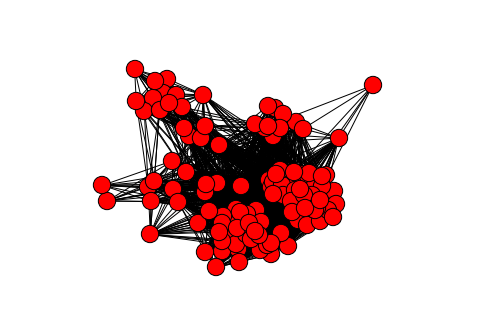

In [4]:
# Here you can visualize your import:

import matplotlib.pyplot as plot
%matplotlib inline
net.draw(NWfromEdges)

2.2 **Importing from Adjacency Matrix:**

This is another possible format:
<img src="pics/matrix.png" width="900">

Please use this code in this situation:

In [5]:
# Getting the matrix (edges):
EdgesAsDF = pandas.read_csv('Data/dataFigueroa.csv', index_col=0)

print EdgesAsDF.shape
print EdgesAsDF.index #row names

(37, 38)
Index([u'Romero', u'Grana', u'Miro Quesada', u'Moreyra', u'Fort',
       u'De La Puente', u'Wiese', u'Onrubia', u'Brescia', u'Nicolini',
       u'Montero', u'Picaso', u'Bentin', u'Benavides', u'Bustamante',
       u'Woodman Pollit', u'Raffo', u'Piazza', u'Berckemeyer', u'Llosa Barber',
       u'Beoutis Ledesma', u'Rizo Patron', u'Montori', u'Sotomayor',
       u'Cilloniz', u'Ferreyros', u'Michell', u'Wong Lu', u'Batievsky Spack',
       u'Matos Escalada', u'Galsky', u'Lucioni', u'Rodriguez Rodriguez',
       u'Custer', u'Ikeda', u'Cogorno', u'Arias Davila'],
      dtype='object', name=u'Names')


In [6]:
EdgesAsDF.columns

Index([u'Romero', u'Grana', u'Miro Quesada', u'Moreyra', u'Fort',
       u'De La Puente', u'Wiese', u'Onrubia', u'Brescia', u'Nicolini',
       u'Montero', u'Picaso', u'Bentin', u'Benavides', u'Bustamante',
       u'Woodman Pollit', u'Raffo', u'Piazza', u'Berckemeyer', u'Llosa Barber',
       u'Beoutis Ledesma', u'Rizo Patron', u'Montori', u'Sotomayor',
       u'Cilloniz', u'Ferreyros', u'Michell', u'Wong Lu', u'Batievsky Spack',
       u'Matos Escalada', u'Galsky', u'Lucioni', u'Rodriguez Rodriguez',
       u'Custer', u'Ikeda', u'Cogorno', u'Arias Davila', u'Multinacional'],
      dtype='object')

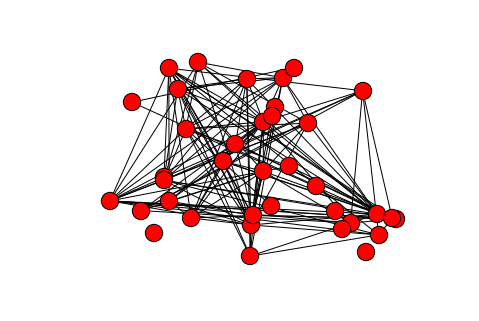

In [7]:
# The adjacency matrix needs not to include the last column in the data frame.
adjacency=EdgesAsDF.ix[:, 0:37]

#saving node labels
labels=list(adjacency)

# Network creation
NWfromMatrix = net.Graph(adjacency.values)

# Adding labels to nodes (relabelling):
NWfromMatrix = net.relabel_nodes(NWfromMatrix, dict(zip(range(37), labels)))
net.draw_random(NWfromMatrix)

**2.3 Adjacency List**

Here is an adjacency list:
<img src="pics/adjacency.png" width="900">

Importing is in simple steps:

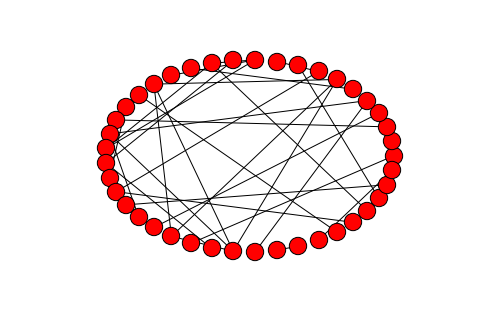

In [8]:
# import networkx as net

NWfromAdjList=net.read_adjlist("Data/warsAdjlist.csv",delimiter=',') # no pandas this time.
net.draw_circular(NWfromAdjList)

**2.4 Node List**
The data from the previous file was original from here:
<img src="pics/wikipage.png" width="900">
There are lists of nodes that can make a network. I present all the steps taken to get it from the wikipedia:

In [9]:
## Informing where the data is:
wikiLink='http://en.wikipedia.org/wiki/List_of_border_wars'
identification = { 'User-Agent' : 'Mozilla/5.0'} # Hiding who you are?

## Getting the html:
from requests import get
wikiPage = get(wikiLink, headers=identification)

## BS will interprete the html
from bs4 import BeautifulSoup as BS
wikiPage = BS(wikiPage.content,'html.parser')

## Let's get all the tables:
wikiTables = wikiPage.findAll('table', {'class': 'sortable wikitable'})

**NEED FOR CLEANING:**
From the previous image, you can see there are many field that will need cleaning:
<img src="pics/clean.png" width="900">

I have create a function (**clean_cell**) to do the cleaning:

In [10]:
import re
def clean_cell(dirtyCellAsString):
    cleanedCell=dirtyCellAsString.replace("million", "000000")
    cleanedCell=cleanedCell.replace(" ", "")
    cleanedCell=cleanedCell.replace(",", "")
    cleanedCell=re.sub(r'[0-9]-|[0-9][0-9]-|[0-9][0-9][0-9]-',"", cleanedCell)
    cleanedCell=re.sub(r'\[[\S ]]',"", cleanedCell)
    cleanedCell=re.findall(r'\d+',cleanedCell)  
    return cleanedCell

In [11]:
# Ready to create the network.

# First create empty network, wich I will populate later:
countriesGraphFullClean=net.Graph()

#This will allow me to make edges when reading set of nodes:
from itertools import combinations

# Do this for each table
for eachTable in wikiTables: 
    # Get all the rows in the table
    allRows=eachTable.find_all("tr")
    # Do this for each row, BUT the first (the column names).
    for eachRow in range(1,len(allRows)):
        # Get all the cells
        allCells = allRows[eachRow].find_all("td")
            
        # Visit the possibly dirty cells, and clean them  that have unclean values and clen
        nameOfConflict=allCells[2].get_text().replace(u'\u2013', '-')            
        start=clean_cell(allCells[0].string)            
        end=clean_cell(allCells[1].string)                        
        fatalities=clean_cell(allCells[4].get_text())
        #end - cleaning
            
        #computing and exceptions
        try:
            duration=float(end[0]) - float(start[0])                
        except (ValueError,IndexError):
            duration=1
        try:
            fatalities=float(fatalities[0])
        except (ValueError,IndexError):
            fatalities=1
            
            
        # Getting the name of the countries in the current conflict in a list
        countries=[country.get_text() for country in allCells[3].find_all('a')]
        
        # Cleaning one case, and rebuilding the list
        countries=['China' if country=="PRC" or country=="People's Republic of China" else country for country in countries]
        
        # Getting the link to eah country webpage
        linksEachCountry=['http://en.wikipedia.org'+country.get('href') for country in allCells[3].find_all('a')] 
        
        # Preparing to save the coordinates of the country:
        coords=[]     
        
        # For every link collected 
        for link in linksEachCountry:
            # some cleaning:
            if link=='http://en.wikipedia.org/wiki/Soviet_Union':
                link='http://en.wikipedia.org/wiki/Russia'
            countryPage=BS(get(link).content,'html.parser')
            # get and unpack the coordinates
            lati,longi=countryPage.find_all("span",{'class': 'geo'})[0].string.split('; ')
            # adding the coordinates to list
            coords.append((float(lati),float(longi))) 

        # pair up countries with its coordinates:
        countryInfo=zip(countries,coords)            
            
        #populating graph
        for country,(lati,longi)in countryInfo:
            countriesGraphFullClean.add_node(country, latitude=lati,longitude=longi)
        for pair in combinations (countries,2):
            countriesGraphFullClean.add_edge(*pair,name=nameOfConflict,duration=duration,fatalities=fatalities)

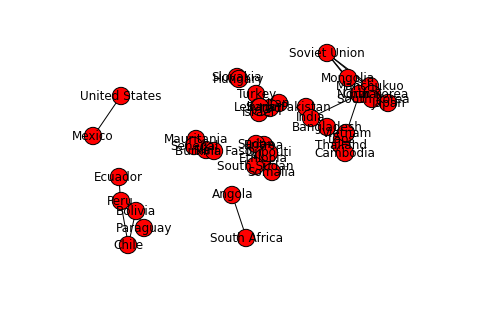

In [12]:
# Plotting the network  using the coordinates:

X=net.get_node_attributes(countriesGraphFullClean,'longitude')
Y=net.get_node_attributes(countriesGraphFullClean,'latitude')
posNet=dict((country,(X[country],Y[country])) for country in X if country in Y)
net.draw(countriesGraphFullClean,pos=posNet,with_labels=True)

## 3. Exploration

Using the data on Peruvian elites:
<img src="pics/elites.png" width="900">

I used this data previously, when importing the adjacency matrix. Now it is time to explore it.

### 3.1 Network level

In [13]:
# The adjacency matrix did not include the nodes attributes.
NWfromMatrix.nodes(data=True)

[('Woodman Pollit', {}),
 ('Bustamante', {}),
 ('Raffo', {}),
 ('Romero', {}),
 ('Onrubia', {}),
 ('Arias Davila', {}),
 ('Grana', {}),
 ('De La Puente', {}),
 ('Ikeda', {}),
 ('Llosa Barber', {}),
 ('Custer', {}),
 ('Berckemeyer', {}),
 ('Cilloniz', {}),
 ('Moreyra', {}),
 ('Montero', {}),
 ('Fort', {}),
 ('Picaso', {}),
 ('Piazza', {}),
 ('Rizo Patron', {}),
 ('Wiese', {}),
 ('Miro Quesada', {}),
 ('Sotomayor', {}),
 ('Rodriguez Rodriguez', {}),
 ('Ferreyros', {}),
 ('Wong Lu', {}),
 ('Brescia', {}),
 ('Cogorno', {}),
 ('Michell', {}),
 ('Matos Escalada', {}),
 ('Benavides', {}),
 ('Beoutis Ledesma', {}),
 ('Lucioni', {}),
 ('Montori', {}),
 ('Batievsky Spack', {}),
 ('Bentin', {}),
 ('Nicolini', {}),
 ('Galsky', {})]

In [14]:
# Let's add attributes:
EdgesAsDF = pandas.read_csv('Data/dataFigueroa.csv')
# Creating a dict to make the merge:
attribute= {x:y for (x,y) in EdgesAsDF[['Names','Multinacional']].to_records(index=False)}
attribute # network nodes not yet updated

{'Arias Davila': 1,
 'Batievsky Spack': 1,
 'Benavides': 1,
 'Bentin': 1,
 'Beoutis Ledesma': 1,
 'Berckemeyer': 0,
 'Brescia': 1,
 'Bustamante': 1,
 'Cilloniz': 1,
 'Cogorno': 0,
 'Custer': 0,
 'De La Puente': 1,
 'Ferreyros': 0,
 'Fort': 1,
 'Galsky': 0,
 'Grana': 1,
 'Ikeda': 0,
 'Llosa Barber': 1,
 'Lucioni': 0,
 'Matos Escalada': 1,
 'Michell': 0,
 'Miro Quesada': 1,
 'Montero': 1,
 'Montori': 1,
 'Moreyra': 1,
 'Nicolini': 1,
 'Onrubia': 1,
 'Piazza': 1,
 'Picaso': 1,
 'Raffo': 1,
 'Rizo Patron': 1,
 'Rodriguez Rodriguez': 1,
 'Romero': 1,
 'Sotomayor': 1,
 'Wiese': 1,
 'Wong Lu': 1,
 'Woodman Pollit': 1}

In [15]:
for node in NWfromMatrix.nodes():
    # merging
    NWfromMatrix.node[node]['Multinational']=int(attribute[node]) # int?

# Nodes updated!
NWfromMatrix.nodes(data=True)

[('Woodman Pollit', {'Multinational': 1}),
 ('Bustamante', {'Multinational': 1}),
 ('Raffo', {'Multinational': 1}),
 ('Romero', {'Multinational': 1}),
 ('Onrubia', {'Multinational': 1}),
 ('Arias Davila', {'Multinational': 1}),
 ('Grana', {'Multinational': 1}),
 ('De La Puente', {'Multinational': 1}),
 ('Ikeda', {'Multinational': 0}),
 ('Llosa Barber', {'Multinational': 1}),
 ('Custer', {'Multinational': 0}),
 ('Berckemeyer', {'Multinational': 0}),
 ('Cilloniz', {'Multinational': 1}),
 ('Moreyra', {'Multinational': 1}),
 ('Montero', {'Multinational': 1}),
 ('Fort', {'Multinational': 1}),
 ('Picaso', {'Multinational': 1}),
 ('Piazza', {'Multinational': 1}),
 ('Rizo Patron', {'Multinational': 1}),
 ('Wiese', {'Multinational': 1}),
 ('Miro Quesada', {'Multinational': 1}),
 ('Sotomayor', {'Multinational': 1}),
 ('Rodriguez Rodriguez', {'Multinational': 1}),
 ('Ferreyros', {'Multinational': 0}),
 ('Wong Lu', {'Multinational': 1}),
 ('Brescia', {'Multinational': 1}),
 ('Cogorno', {'Multinati

### 3. 1 Exploring the NETWORK

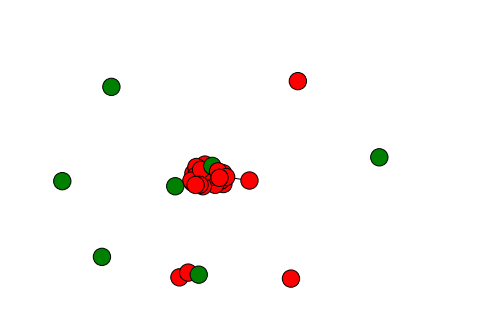

In [16]:
# Is this a connected network?
color_map = {1:'r', 0:'g'} 
colors=[color_map[NWfromMatrix.node[node]['Multinational']] for node in NWfromMatrix]
net.draw(NWfromMatrix,node_color=colors)

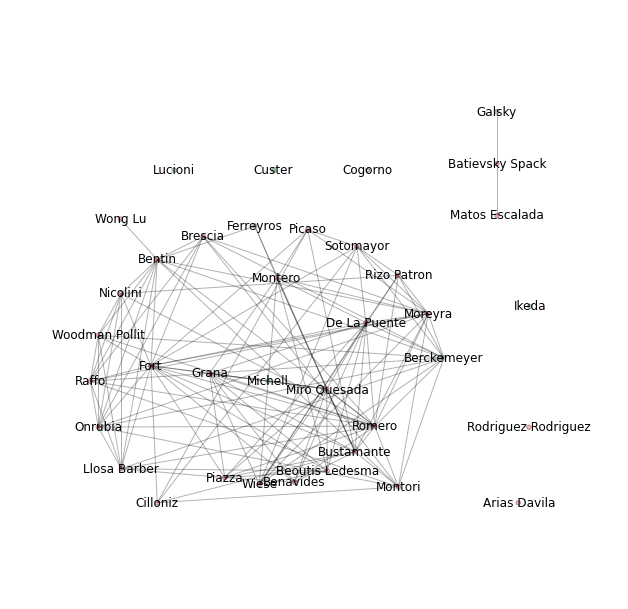

In [17]:
#Improving the visualization with graphviz!
pos=net.graphviz_layout(NWfromMatrix, prog='twopi') # twopi, dot, neato, fdp, sfdp, circo
plot.figure(figsize=(8,8))
net.draw(NWfromMatrix,pos,node_size=20,node_color=colors, with_labels=True, alpha=0.3)

In [18]:
# The network is not connected. Lets get some details:

# Components inventory
components=[subnet for subnet in net.connected_component_subgraphs(NWfromMatrix)]
len(components),[len(sub) for sub in components]

(8, [28, 1, 1, 1, 1, 1, 3, 1])

In [19]:
#Let's work with the giant component:
NWfromMatrix_giant = max(net.connected_component_subgraphs(NWfromMatrix), key=len)

In [20]:
# How dense or sparse?
net.density(NWfromMatrix_giant) #from 0 to 1 (where 1 makes it a complete nw)

0.35185185185185186

In [21]:
#Do nodes tend to connect to nodes similar in degree?
net.degree_assortativity_coefficient(NWfromMatrix_giant) #positive tends to assortativeness

-0.12086710760602028

In [22]:
# random networks have small SP and small CC...is this the case?
net.average_shortest_path_length(NWfromMatrix_giant),net.average_clustering(NWfromMatrix_giant)

(1.7407407407407407, 0.6303553742684659)

In [23]:
# How probable is that two business men with a common business friend, are also friends.
net.transitivity(NWfromMatrix_giant) 

0.5829694323144105

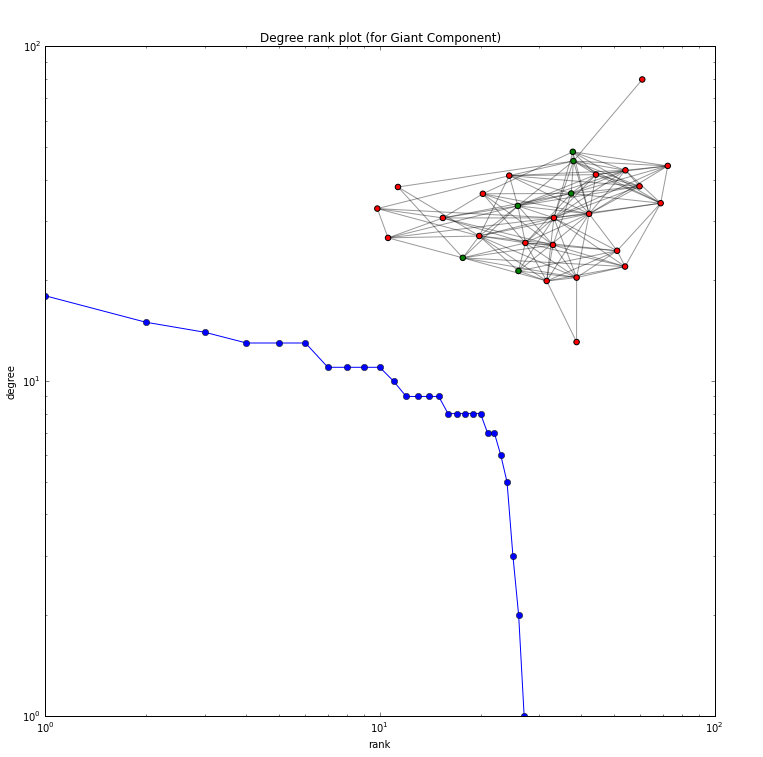

In [24]:
# Adapted from 
# https://networkx.github.io/documentation/latest/examples/drawing/degree_histogram.html
degree_sequence=sorted(net.degree(NWfromMatrix_giant).values(),reverse=True) 
plot.figure(figsize=(12,12))
plot.loglog(degree_sequence,'b-',marker='o')
plot.title("Degree rank plot (for Giant Component)")
plot.ylabel("degree") ; plot.xlabel("rank")

# draw graph in inset
plot.axes([0.47,0.47,0.47,0.47])
pos=net.spring_layout(NWfromMatrix_giant)
plot.axis('off')
net.draw_networkx_nodes(NWfromMatrix_giant,pos,node_size=30,node_color=colors)
net.draw_networkx_edges(NWfromMatrix_giant,pos,alpha=0.4)
plot.show()

### 3.1 Group level

In [25]:
#How many cliques?
len(list(net.find_cliques(NWfromMatrix_giant)))

28

In [26]:
#Are there dominant nodes? (nodes to whom the others are adjacent)
import networkx.algorithms.approximation as netalg
dominants=[n for n in netalg.min_weighted_dominating_set(NWfromMatrix_giant)]
dominants

['Bustamante',
 'Berckemeyer',
 'Romero',
 'Grana',
 'De La Puente',
 'Bentin',
 'Moreyra',
 'Fort']

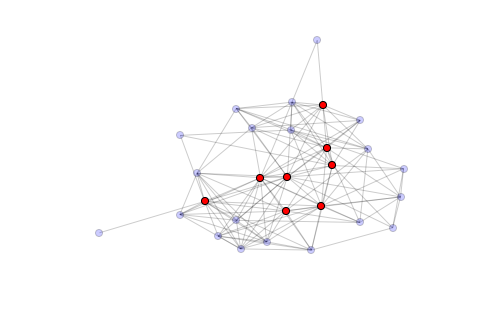

In [27]:
# plotting dominant nodes
pos=net.graphviz_layout(NWfromMatrix_giant, prog='neato')
net.draw(NWfromMatrix_giant,pos,node_color='b',node_size=50, alpha=0.2)
net.draw_networkx_nodes(NWfromMatrix_giant,pos,nodelist=dominants,node_size=50,node_color='r')
plot.show()

In [28]:
# Edges such that no two edges share a common endpoint and 
# every edge not in the set shares some common endpoint in the set?
maximalMatchingEdges=netalg.min_maximal_matching(NWfromMatrix_giant)
maximalMatchingEdges
# should I apply set(Nodes_maximalMatchingEdges)

{('Brescia', 'Montori'),
 ('Bustamante', 'Picaso'),
 ('Cilloniz', 'Sotomayor'),
 ('De La Puente', 'Benavides'),
 ('Ferreyros', 'Bentin'),
 ('Fort', 'Miro Quesada'),
 ('Grana', 'Michell'),
 ('Llosa Barber', 'Beoutis Ledesma'),
 ('Montero', 'Wiese'),
 ('Moreyra', 'Rizo Patron'),
 ('Onrubia', 'Berckemeyer'),
 ('Romero', 'Piazza'),
 ('Woodman Pollit', 'Raffo')}

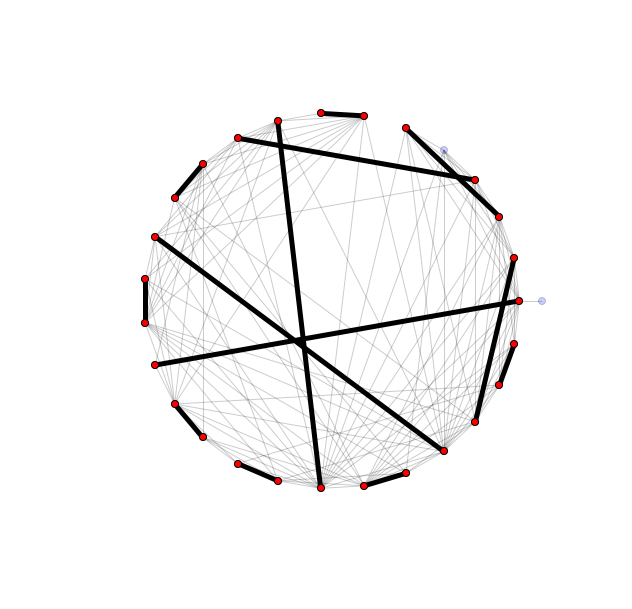

In [29]:
# Plotting maximalMatchingEdges

pos=net.graphviz_layout(NWfromMatrix,prog='circo',args='') 
plot.figure(figsize=(8,8))
net.draw(NWfromMatrix_giant,pos,node_color='b',node_size=50, alpha=0.2)

#nodes
Nodes_maximalMatchingEdges=[]
for nodes in maximalMatchingEdges:
    Nodes_maximalMatchingEdges.extend(list(nodes))

net.draw_networkx_nodes(NWfromMatrix_giant,pos,node_color = 'r', 
                  node_size = 50, with_labels = False, nodelist=Nodes_maximalMatchingEdges)

# edges
net.draw_networkx_edges(NWfromMatrix_giant,pos,width=5.0, color='r',edgelist=list(maximalMatchingEdges))
plot.show()

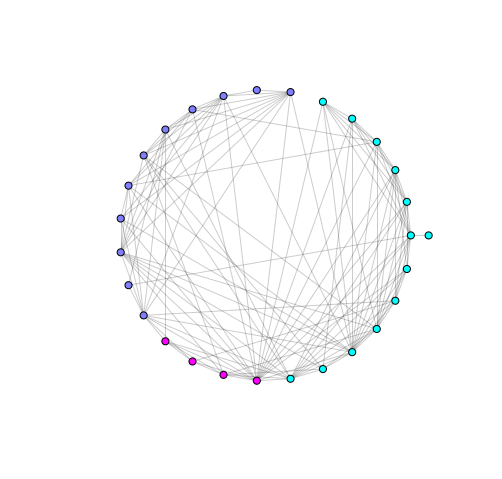

In [30]:
# COMMUNITY DETECTION

# based on: https://perso.uclouvain.be/vincent.blondel/research/louvain.html
# pip install python-louvain

import community 
parts = community.best_partition(NWfromMatrix_giant)
values = [parts.get(node) for node in NWfromMatrix_giant.nodes()]
pos=net.graphviz_layout(NWfromMatrix,prog='circo',args='') 
plot.figure(figsize=(8,8))
plot.axis("off")
net.draw_networkx_nodes(NWfromMatrix_giant,pos,cmap = plot.get_cmap("cool"), node_color = values, 
                  node_size = 50, with_labels = False)

# edges
net.draw_networkx_edges(NWfromMatrix_giant,pos,width=1.0,alpha=0.2)
plot.show()

### 3.3 Nodes

In [31]:
#Central nodes: degree

from operator import itemgetter
NodeDegree=sorted(NWfromMatrix_giant.degree().items(), key=itemgetter(1),reverse=True)
NodeDegree[:5]

[('Fort', 19),
 ('Romero', 18),
 ('Moreyra', 15),
 ('De La Puente', 14),
 ('Bustamante', 13)]

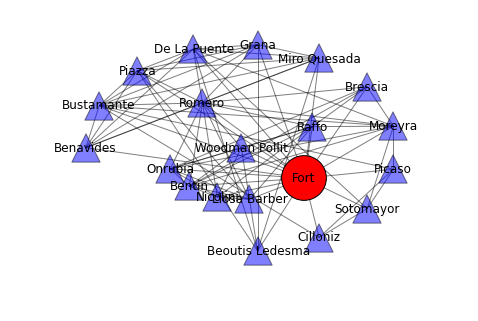

In [32]:
# Ego network of Hub?
HubNode,HubDegree=NodeDegree[0]
HubEgonet=net.ego_graph(NWfromMatrix_giant,HubNode)
pos=net.graphviz_layout(HubEgonet,prog='twopi',args='')
net.draw(HubEgonet,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')
net.draw_networkx_nodes(HubEgonet,pos,nodelist=[HubNode],node_size=2000,node_color='r')
plot.show()

In [33]:
# minimum number of nodes that must be removed to disconnect the network?
netalg.node_connectivity(NWfromMatrix_giant)

1

In [34]:
#who can break the network?
list(net.articulation_points(NWfromMatrix_giant))

['Bentin']

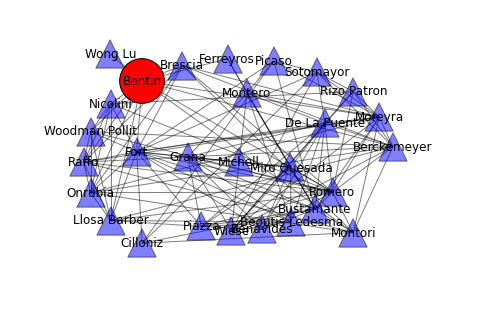

In [35]:
# Ego network of articulation node?
pos=net.graphviz_layout(NWfromMatrix_giant,prog='twopi',args='')
net.draw(NWfromMatrix_giant,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')
net.draw_networkx_nodes(NWfromMatrix_giant,pos,nodelist=['Bentin'],node_size=2000,node_color='r')
plot.show()

In [36]:
# Computing centrality measures:
degr=net.degree_centrality(NWfromMatrix_giant)  # direct connections
clos=net.closeness_centrality(NWfromMatrix_giant) # easiness to access the rest
betw=net.betweenness_centrality(NWfromMatrix_giant) # control flow among the network
eige=net.eigenvector_centrality(NWfromMatrix_giant) # control flow among the network

In [37]:
# measures into a data frame:
Centrality=[ [rich, degr[rich],clos[rich],betw[rich],eige[rich]] for rich in NWfromMatrix_giant]
headers=['Businessman','Degree','Closeness','Betweenness','Eigenvector']
DFCentrality=pandas.DataFrame(Centrality,columns=headers)

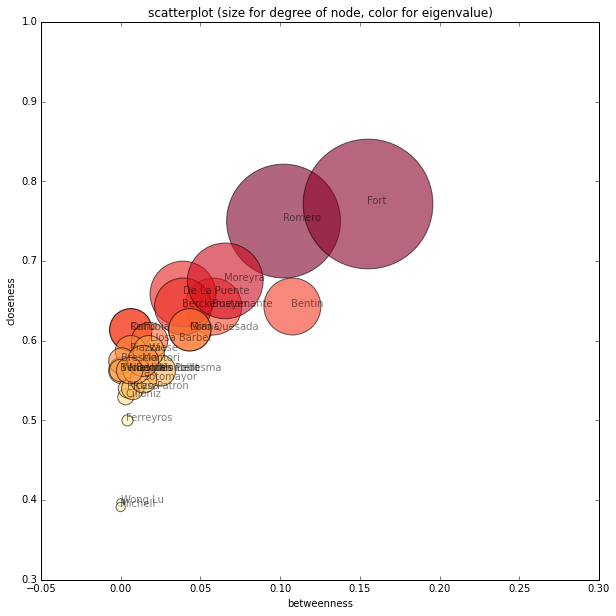

In [38]:
# plotting thr three values
#values = [parts.get(node) for node in NWfromMatrix_giant.nodes()]
fig, ax = plot.subplots(figsize=(10,10))
ax.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
           c=DFCentrality.Eigenvector,
           cmap=plot.get_cmap('YlOrRd'), alpha=0.6)
for i in range(len(DFCentrality.index)):
    ax.annotate(DFCentrality['Businessman'][i], (DFCentrality['Betweenness'][i],DFCentrality['Closeness'][i]),alpha=0.5)
plot.title("scatterplot (size for degree of node, color for eigenvalue)")
plot.xlabel("betweenness")
plot.ylabel("closeness")
plot.show()

## 5. Exporting the Network

In [39]:
net.write_graphml(NWfromMatrix, "Data/giantElite.graphml",encoding='utf-8')
net.write_gexf(NWfromMatrix, "Data/giantElite.gexf",encoding='utf-8')
net.write_graphml(countriesGraphFullClean, "Data/WarsGephi.gexf",encoding='utf-8')
net.write_gexf(countriesGraphFullClean, "Data/WarsGephi.gexf",encoding='utf-8')